In [71]:
# Basic Tools
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap

# Sckit-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader




# Used Dataset 
iris = datasets.load_iris()
url ="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"


# Reading the data

In [72]:
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [73]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [74]:
df.species = df.species.map({'setosa':0, 'virginica':1, 'versicolor':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


## Analisando os dados do DataSet Iris

In [75]:
df['species'].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='species'>

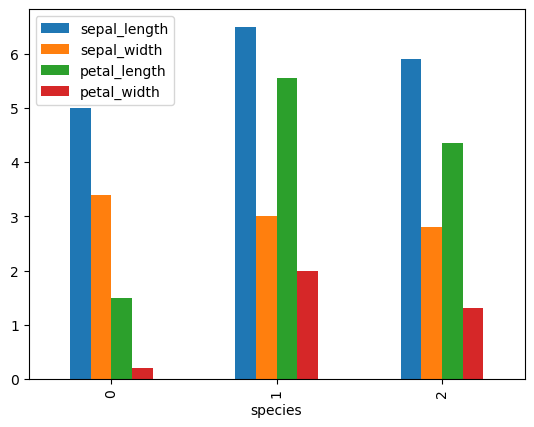

In [76]:
df.groupby('species').median().plot(kind='bar')

In [77]:
headers_list = df.columns.values.tolist()

In [78]:
cm = np.corrcoef(df[headers_list].values.T)

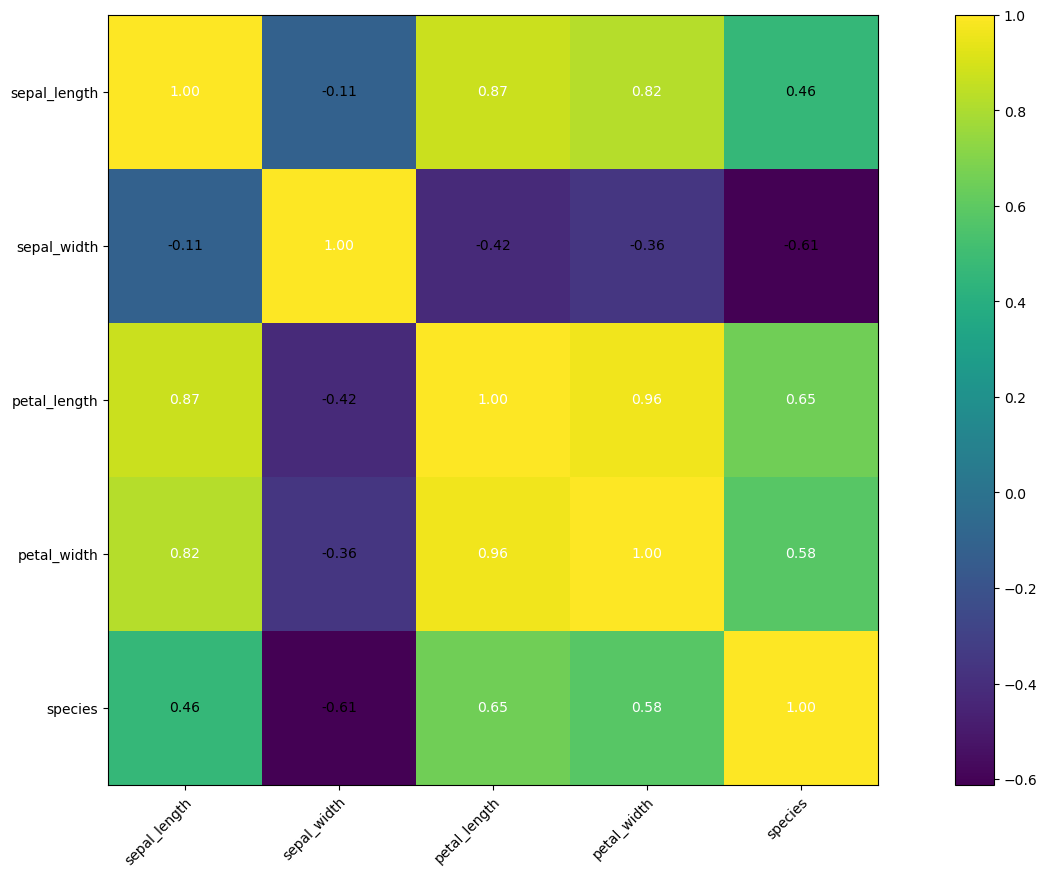

In [79]:
# Checando a coorelação entre as variáveis

hm = heatmap(cm, row_names= headers_list,column_names= headers_list, figsize=[20,10])
plt.show()


### Conclusão
O DataSet oferece uma distribução de flores, suas caracteristicas físicas e sua respectiva especies. Com isso irei utilizar as caracteristicas mais relevantes de cada flor para determinar qual especie ela é. Todas a caracteristas são úteis para poder fazer o modelo, exceto a 'Sepal Width', essa é a única caracteristica que não será relevante para a criação do modelo

## Separando X e y

In [80]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [81]:
data = df.to_numpy()
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [82]:
data.shape

(150, 5)

In [83]:
X = data[:,:-1]

y = data[:, -1]


In [84]:
print(X)
X.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

(150, 4)

In [85]:
print(y)
y.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


(150,)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [87]:
X_train.shape

(112, 4)

In [88]:
X_test.shape

(38, 4)

# Tratamento de Dados

#### Converter cada array de Numpy em Tensores

In [89]:
X_test_T = torch.tensor(X_test)
X_train_T = torch.tensor(X_train)
y_test_T = torch.tensor(y_test)
y_train_T = torch.tensor(y_train)



In [90]:
X_test_T

tensor([[5.8000, 2.8000, 5.1000, 2.4000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.1000, 2.6000, 5.6000, 1.4000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.6000, 2.8000, 4.9000, 2.0000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0

In [91]:

class Iris_Dataset(Dataset):
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]
    
    
# 

## Data Loader

In [92]:
train_dl = DataLoader(Iris_Dataset(X_train_T, y_train_T),  batch_size = len(X_train_T) )
test_dl  = DataLoader(Iris_Dataset(X_test_T, y_test_T),  batch_size = len(X_test_T) )
                             
   

# Criando o Modelo MLP

In [93]:
# Criar uma classe que herda o modulo nn.Module
class MLP_Model(nn.Module):
    
    def __init__(self):
        super(MLP_Model,self).__init__()
        
        # nn.Linear(a,b) --> a entrada, b mapeia ?
        # O primeiro neurônio tem 4 no parênteses pois o data set tem 4 caracteristicas no X,  
        
        self.L1 =  nn.Linear(4,32)
        
        
        
        self.A1 =  nn.ReLU()
        
        # No segundo, receberá o tanto que saiu na layer passada, logo:
        # nn.Linear(c,d) --> c == a, d == quantidasde que sera y previsto, ex: probabilidade de ser cada uma das flores
        
        self.L2 =  nn.Linear(32,16)
        
        self.L3 =  nn.Linear(16,8)
        
        self.L4 =  nn.Linear(8,3) 
        
        # SoftMax é uma função para classificação, ela é similar à função sigmoid
        
        self.A2 = nn.Softmax()
        
    def forward(self, x):
        
        
        
        x = self.L1(x)
        
        
        # Aqui estou transformando o vetor inicial de 4 em um vetor de 5
        
        x = self.A1(x)
       
        
        # Escalando o vetor via função sigmoid, outra possivel é a função reLU --> ler mais sobre
        
        x = self.L2(x)
        
        
        x = self.A1(x)
        
        x = self.L3(x)
        
        x = self.A1(x)
        
        x = self.L4(x)
        
        # Aqui estou transformando o vetor modificado de tamanho 5 em um vetor de 3
        
        x = self.A2(x)
        
        
        
        return x       

# Dados Do Modelo antes do treino

### Dados para o Histograma dos pesos

In [94]:
y1 = MLP_Model().L1.weight.detach().round(decimals = 3)

L1_value_before_train = torch.histogram(y1)

X_L1_before = L1_value_before_train[1][0:100]
y_L1_before = L1_value_before_train[0]



In [95]:
y2 = MLP_Model().L2.weight.detach().round(decimals = 3)

L2_value_before_train = torch.histogram(y2)

X_L2_before = L2_value_before_train[1][0:100]
y_L2_before = L2_value_before_train[0]


In [96]:
y3 = MLP_Model().L3.weight.detach().round(decimals = 3)

L3_value_before_train = torch.histogram(y3)

X_L3_before = L3_value_before_train[1][0:100]
y_L3_before = L3_value_before_train[0]


In [97]:
y4 = MLP_Model().L4.weight.detach().round(decimals = 3)

L4_value_before_train = torch.histogram(y4)

X_L4_before = L4_value_before_train[1][0:100]
y_L4_before = L4_value_before_train[0]


### Dados Estatisticos dos pesos

#### Layer 1:

In [98]:
weights_L1_before = torch.flatten(MLP_Model().L1.weight.detach())

In [99]:
weights_L2_before = torch.flatten(MLP_Model().L2.weight.detach())

In [100]:
weights_L3_before = torch.flatten(MLP_Model().L3.weight.detach())

In [101]:
weights_L4_before = torch.flatten(MLP_Model().L4.weight.detach())

# Treino


In [102]:

def training( N_Epochs, model, loss_fn, opt  ):
    
    loss_list = []
    
    for epoch in tqdm(range(N_Epochs+1)):
        for xb, yb in train_dl:
            
            
            
            y_pred = model(xb.float())
            loss   = loss_fn(y_pred, yb.long())
        
            
            opt.zero_grad()
            loss.backward()
            opt.step()
        
            loss_list.append(loss.item())
    
    L1_weights = MLP_Model().L1.weight.detach()
    L2_weights = MLP_Model().L2.weight.detach()
    L3_weights = MLP_Model().L3.weight.detach()
    L4_weights = MLP_Model().L4.weight.detach()
    
       
    
    plt.figure(figsize = (14,6))
    plt.title("cost decay")
    plt.plot(loss_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")
    torch.save(MLP_Model().state_dict(), 'meu_modelo_treinado_iris.pth')
    
    return L1_weights, L2_weights, L3_weights, L4_weights
            




  0%|          | 0/1501 [00:00<?, ?it/s]c:\Users\Erick\anaconda3\envs\Study\Lib\site-packages\torch\nn\modules\module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 1501/1501 [00:03<00:00, 394.08it/s]


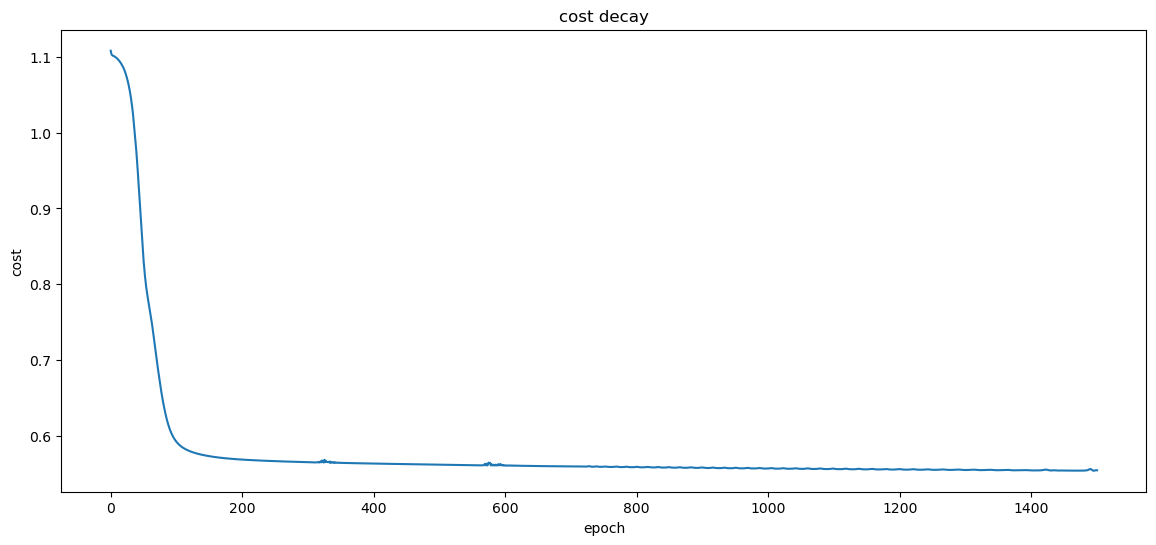

In [103]:
model = MLP_Model()

epochs = 1500

opt        = torch.optim.Adam( model.parameters(), lr=0.003 )

loss_fn    = nn.CrossEntropyLoss( )   

x1,x2,x3,x4 = training( epochs, model , loss_fn, opt )


# Avaliação do Modelo

In [104]:
with torch.no_grad():
    model.eval()
    
    for xb, yb in test_dl:
        
        
        y_pred = model(xb.float())



    
    yf = torch.argmax(y_pred, dim=1)
    
    print(classification_report(yb, yf))        
        
            
            
    
# Dropoup --> apagar saida de um neuronio
# argmax --> pega o ag

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Fazendo Histograma dos valores de cada layer

## Como será feito

In [105]:
MLP_Model().L1.weight

Parameter containing:
tensor([[-0.3105,  0.1314,  0.1598,  0.3950],
        [-0.2033,  0.0818, -0.2967,  0.0075],
        [ 0.3880,  0.1410,  0.2563, -0.3385],
        [-0.3663, -0.2118, -0.4423,  0.1543],
        [ 0.3286, -0.3627,  0.4059, -0.3144],
        [-0.2920, -0.1793,  0.2163,  0.1664],
        [ 0.3954,  0.0995, -0.2766, -0.0124],
        [-0.2178,  0.2999,  0.3160, -0.3529],
        [-0.3251,  0.0611,  0.3463, -0.4833],
        [ 0.1854, -0.3661,  0.0573,  0.1257],
        [ 0.3707, -0.3870, -0.0552, -0.0431],
        [-0.4742,  0.2673, -0.1916, -0.2684],
        [-0.4666,  0.4409, -0.4943, -0.2849],
        [ 0.0896, -0.0871, -0.0124,  0.3952],
        [-0.3984, -0.4854, -0.4985, -0.3186],
        [ 0.4447, -0.2960, -0.0470, -0.3285],
        [ 0.4895,  0.1656, -0.1904, -0.3859],
        [-0.0072, -0.2410,  0.0892,  0.0482],
        [ 0.0327, -0.0475, -0.2565,  0.4049],
        [-0.4657, -0.1319, -0.0292,  0.0276],
        [-0.0720, -0.4007, -0.3184, -0.1894],
        [ 0.

In [106]:
MLP_Model().L1.weight.shape

torch.Size([32, 4])

In [143]:
model = MLP_Model()

model.load_state_dict(torch.load('meu_modelo_treinado_iris.pth', weights_only=False))

x11 = model.L1.weight.detach().round(decimals = 3)
L1_value_after_train = torch.histogram(x11.round(decimals = 3))

X_L1_after =L1_value_after_train[1][0:100]
y_L1_after =L1_value_after_train[0]



In [111]:
L2_value_after_train = torch.histogram(x2.round(decimals = 2))

X_L2_after = L2_value_after_train[1][0:100]
y_L2_after = L2_value_after_train[0]


In [112]:
L3_value_after_train = torch.histogram(x3.round(decimals = 2))

X_L3_after = L3_value_after_train[1][0:100]
y_L3_after = L3_value_after_train[0]


In [113]:
L4_value_after_train = torch.histogram(x4.round(decimals=2))

X_L4_after = L4_value_after_train[1][0:100]
y_L4_after = L4_value_after_train[0]

In [114]:
delta_L1 = torch.histogram((x1 - y1).round(decimals = 2))
X = delta_L1[1][0:100] 
y = delta_L1[0]

## Histograms


### Linear 1

In [115]:
x11.sort()[0]

tensor([[-0.1800, -0.0600,  0.2700,  0.3500],
        [-0.1300, -0.0800,  0.1000,  0.1200],
        [-0.4500, -0.3200,  0.3700,  0.3800],
        [-0.1900,  0.1500,  0.1600,  0.4300],
        [-0.2400, -0.2400, -0.0600, -0.0600],
        [-0.3800, -0.0800,  0.1800,  0.3200],
        [-0.4700,  0.2600,  0.4400,  0.4800],
        [-0.3200, -0.0600, -0.0400,  0.3600],
        [-0.3000, -0.0800,  0.0200,  0.3900],
        [-0.4800, -0.4700, -0.1500,  0.4600],
        [-0.4600, -0.2300,  0.0200,  0.4400],
        [-0.4700, -0.4200,  0.0600,  0.3800],
        [-0.2600,  0.3400,  0.3500,  0.3700],
        [-0.1400,  0.0800,  0.3200,  0.4200],
        [-0.4800, -0.3100, -0.2500,  0.3000],
        [-0.1800,  0.0300,  0.1400,  0.4000],
        [-0.1600,  0.2300,  0.3900,  0.4900],
        [-0.4100,  0.0300,  0.1700,  0.2800],
        [-0.5000, -0.4300, -0.1100,  0.4300],
        [-0.4600, -0.4100,  0.1700,  0.4500],
        [ 0.0200,  0.0700,  0.3200,  0.3800],
        [-0.2300,  0.1100,  0.1400

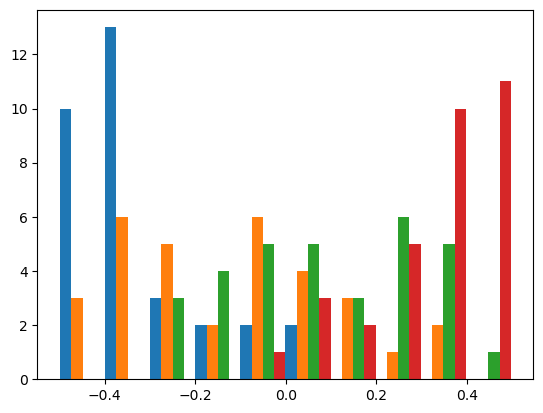

In [145]:
hist_before_train = plt.hist(y1.sort()[0].round(decimals=3), rwidth=1)

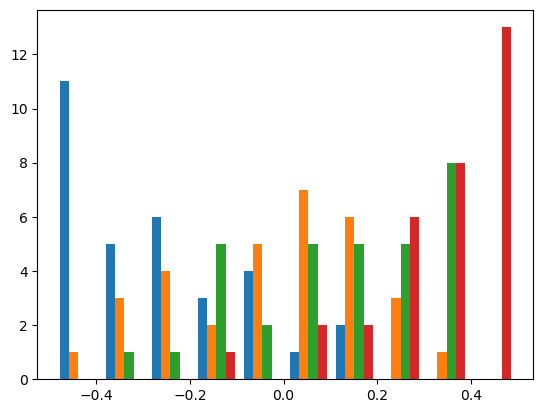

In [146]:
hist_after_train = plt.hist(x11.sort()[0].round(decimals=3))

### Linear 2

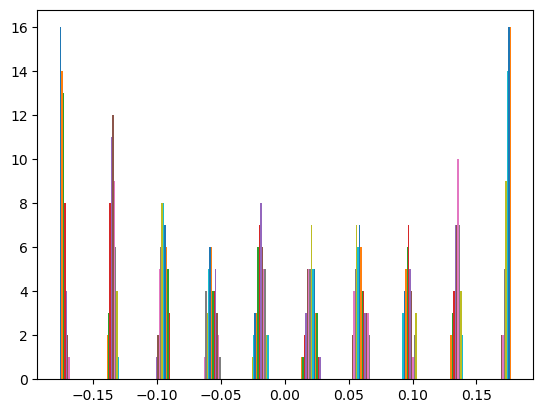

In [118]:
hist_before_train = plt.hist(y2.sort()[0].round(decimals=3), rwidth=1)

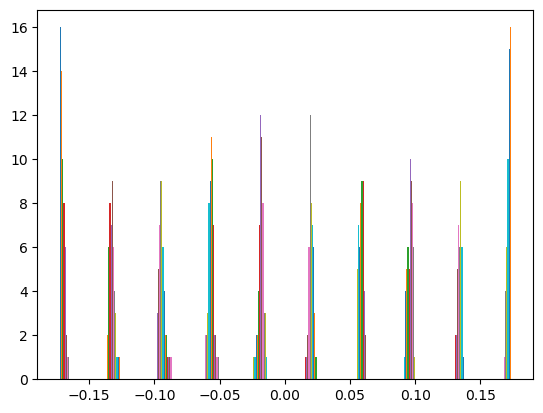

In [119]:
hist_after_train = plt.hist(x2.sort()[0].round(decimals=3))

### Linear 3

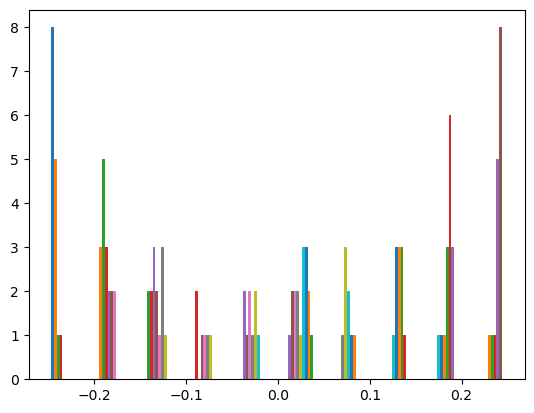

In [120]:
hist_before_train = plt.hist(y3.sort()[0].round(decimals=3), rwidth=1)

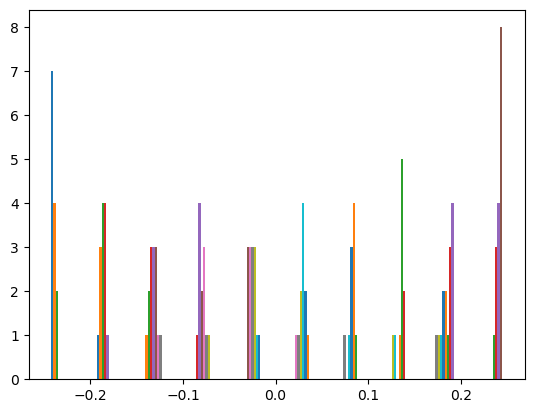

In [121]:
hist_after_train = plt.hist(x3.sort()[0].round(decimals=3))

### Linear 4

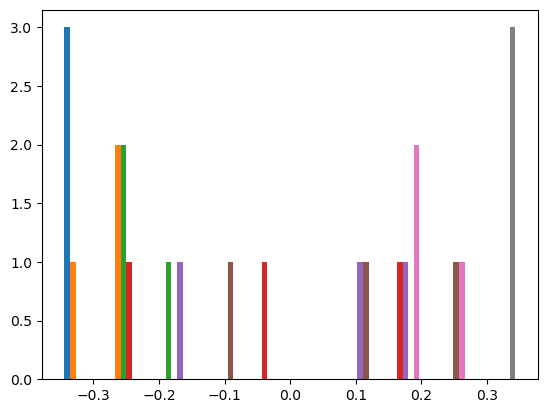

In [122]:
hist_before_train = plt.hist(y4.sort()[0].round(decimals=3), rwidth=1)

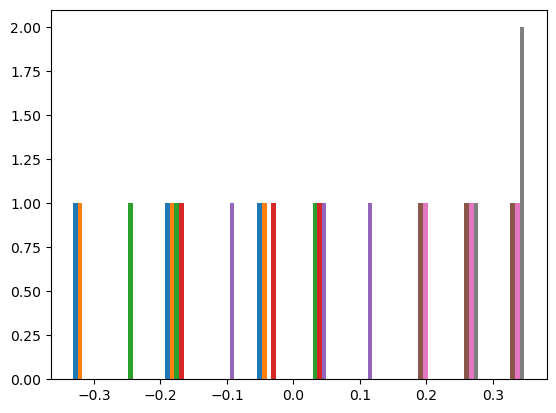

In [123]:
hist_after_train = plt.hist(x4.sort()[0].round(decimals=3))

# Dados Estatisticos de todos os pesos

Será Utilizado o seguinte método para obter dados estatisticos dos pesos:

In [124]:
model.L1.weight.detach().round(decimals=2)

tensor([[-0.1800, -0.0600,  0.2700,  0.3500],
        [ 0.1000, -0.1300,  0.1200, -0.0800],
        [-0.4500, -0.3200,  0.3800,  0.3700],
        [ 0.1500,  0.4300,  0.1600, -0.1900],
        [-0.2400, -0.2400, -0.0600, -0.0600],
        [-0.3800,  0.3200, -0.0800,  0.1800],
        [ 0.2600,  0.4800,  0.4400, -0.4700],
        [ 0.3600, -0.3200, -0.0600, -0.0400],
        [-0.3000,  0.3900, -0.0800,  0.0200],
        [-0.4800, -0.1500,  0.4600, -0.4700],
        [ 0.4400,  0.0200, -0.2300, -0.4600],
        [ 0.3800, -0.4200, -0.4700,  0.0600],
        [ 0.3500, -0.2600,  0.3400,  0.3700],
        [-0.1400,  0.4200,  0.3200,  0.0800],
        [-0.2500,  0.3000, -0.3100, -0.4800],
        [ 0.1400, -0.1800,  0.4000,  0.0300],
        [ 0.3900, -0.1600,  0.2300,  0.4900],
        [ 0.1700,  0.0300,  0.2800, -0.4100],
        [-0.4300, -0.5000,  0.4300, -0.1100],
        [-0.4600,  0.1700, -0.4100,  0.4500],
        [ 0.0200,  0.3800,  0.3200,  0.0700],
        [-0.2300,  0.3200,  0.1400

In [125]:
weights_L1_after = torch.flatten(model.L1.weight.detach().round(decimals=2))

In [126]:
weights_L2_after = torch.flatten(model.L2.weight.detach().round(decimals=2))

In [127]:
weights_L3_after = torch.flatten(model.L3.weight.detach().round(decimals=2))

In [128]:
weights_L3_after = torch.flatten(model.L4.weight.detach().round(decimals=2))

## Layer 1

In [129]:
mean_b, mean_a = torch.mean(weights_L1_before).item(),torch.mean(weights_L1_after).item()


In [130]:
mode_b ,mode_a = torch.mode(weights_L1_before)[0].item(),torch.mode(weights_L1_after)[0].item()

In [131]:
median_b,median_a = torch.median(weights_L1_before).item(),torch.median(weights_L1_after).item()

In [132]:
max_b, max_a = torch.max(weights_L1_before).item(),torch.max(weights_L1_after).item()

In [133]:
min_b,min_a = torch.min(weights_L1_before).item(),torch.min(weights_L1_after).item()

In [134]:
data = {'Layer 1':["Mean", "Mode", "Median","Max", "Min"],"Before":[mean_b,mode_b,median_b, max_b,min_b ], "After":[mean_a,mode_a,median_a,max_a,min_a]}
df = pd.DataFrame.from_dict(data)
df["Delta"] = df["After"] - df["Before"]
df

,Layer 1,Before,After,Delta
0,Mean,0.015850,0.022109,0.006260
1,Mode,-0.480999,0.140000,0.620999
2,Median,0.011096,0.060000,0.048904
3,Max,0.488330,0.490000,0.001670
4,Min,-0.480999,-0.500000,-0.019001


## Layer 2

In [135]:
mean_b, mean_a = torch.mean(weights_L2_before).item(),torch.mean(weights_L2_after).item()


In [136]:
mode_b ,mode_a = torch.mode(weights_L2_before)[0].item(),torch.mode(weights_L2_after)[0].item()

In [137]:
median_b,median_a = torch.median(weights_L2_before).item(),torch.median(weights_L2_after).item()

In [138]:
max_b, max_a = torch.max(weights_L2_before).item(),torch.max(weights_L2_after).item()

In [139]:
min_b,min_a = torch.min(weights_L2_before).item(),torch.min(weights_L2_after).item()

In [140]:
data = {'Layer 1':["Mean", "Mode", "Median","Max", "Min"],"Before":[mean_b,mode_b,median_b, max_b,min_b ], "After":[mean_a,mode_a,median_a,max_a,min_a]}
df = pd.DataFrame.from_dict(data)
df["Delta"] = df["After"] - df["Before"]
df

,Layer 1,Before,After,Delta
0,Mean,-0.000317,-0.00418,-0.003863
1,Mode,-0.176658,-0.10000,0.076658
2,Median,0.000702,0.00000,-0.000702
3,Max,0.176736,0.18000,0.003264
4,Min,-0.176658,-0.18000,-0.003342
